
Analisando para random_state=42:
  - k=3: Acurácia = 0.74

Matriz de Confusão para k=3:
[[17  0  2]
 [ 1 15  5]
 [ 1  5  8]]

Relatório de Classificação para k=3:
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.75      0.71      0.73        21
           3       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



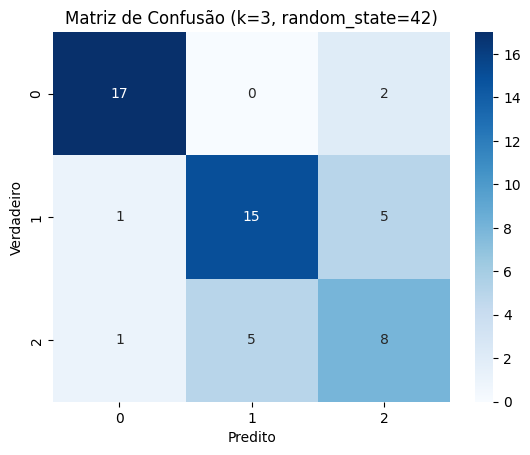

  - k=5: Acurácia = 0.74

Matriz de Confusão para k=5:
[[17  0  2]
 [ 1 15  5]
 [ 1  5  8]]

Relatório de Classificação para k=5:
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.75      0.71      0.73        21
           3       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



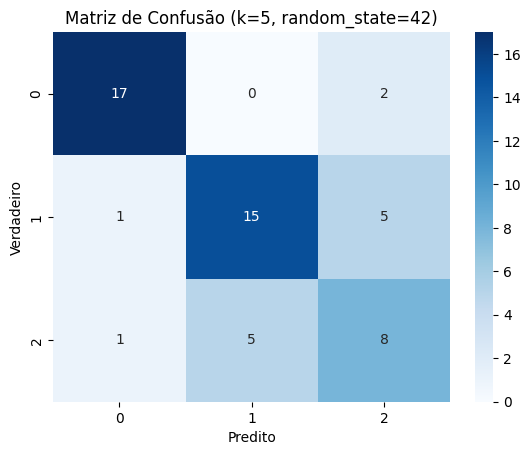


Analisando para random_state=17:
  - k=3: Acurácia = 0.65

Matriz de Confusão para k=3:
[[11  0  0]
 [ 1 18  4]
 [ 5  9  6]]

Relatório de Classificação para k=3:
              precision    recall  f1-score   support

           1       0.65      1.00      0.79        11
           2       0.67      0.78      0.72        23
           3       0.60      0.30      0.40        20

    accuracy                           0.65        54
   macro avg       0.64      0.69      0.64        54
weighted avg       0.64      0.65      0.61        54



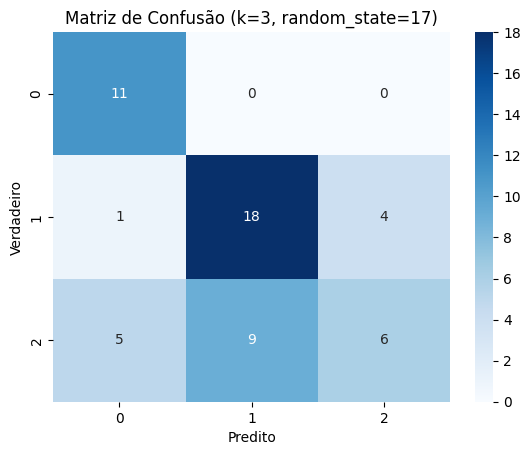

  - k=5: Acurácia = 0.67

Matriz de Confusão para k=5:
[[11  0  0]
 [ 1 19  3]
 [ 3 11  6]]

Relatório de Classificação para k=5:
              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.63      0.83      0.72        23
           3       0.67      0.30      0.41        20

    accuracy                           0.67        54
   macro avg       0.68      0.71      0.66        54
weighted avg       0.67      0.67      0.63        54



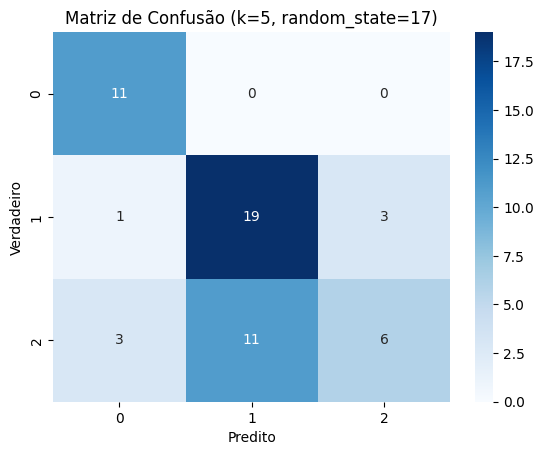


Analisando para random_state=24:
  - k=3: Acurácia = 0.74

Matriz de Confusão para k=3:
[[19  0  2]
 [ 3 13  4]
 [ 1  4  8]]

Relatório de Classificação para k=3:
              precision    recall  f1-score   support

           1       0.83      0.90      0.86        21
           2       0.76      0.65      0.70        20
           3       0.57      0.62      0.59        13

    accuracy                           0.74        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.74      0.74        54



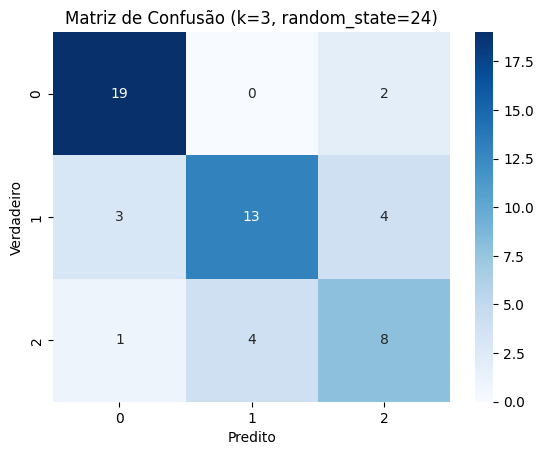

  - k=5: Acurácia = 0.67

Matriz de Confusão para k=5:
[[19  0  2]
 [ 3 14  3]
 [ 1  9  3]]

Relatório de Classificação para k=5:
              precision    recall  f1-score   support

           1       0.83      0.90      0.86        21
           2       0.61      0.70      0.65        20
           3       0.38      0.23      0.29        13

    accuracy                           0.67        54
   macro avg       0.60      0.61      0.60        54
weighted avg       0.64      0.67      0.65        54



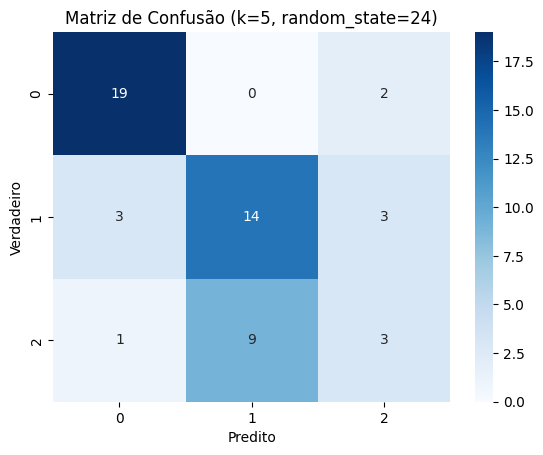

Tabela Comparativa:
   random_state  k  accuracy
0            42  3  0.740741
1            42  5  0.740741
2            17  3  0.648148
3            17  5  0.666667
4            24  3  0.740741
5            24  5  0.666667


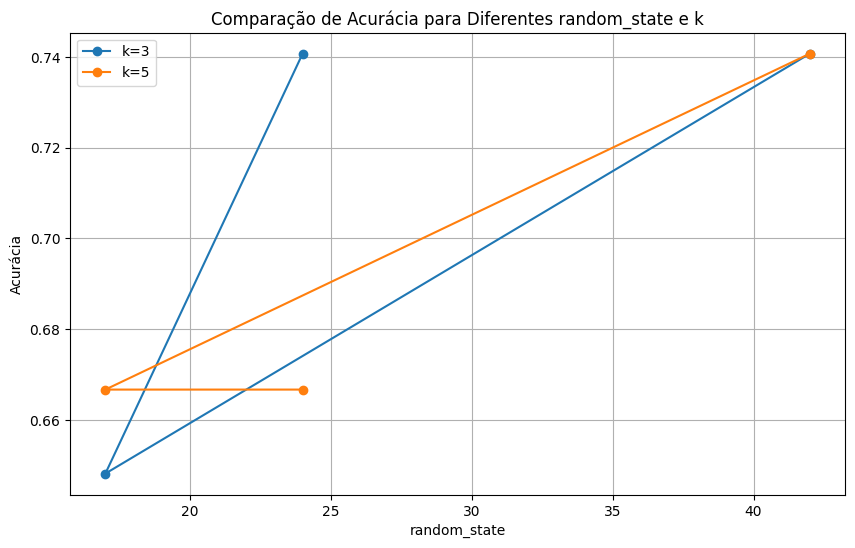

Configuração com Melhor Desempenho:
random_state    42.000000
k                3.000000
accuracy         0.740741
Name: 0, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregamento do dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names_pt_br = [
    'classe', 'alcool', 'acido_malico', 'cinzas', 'alcalinidade_de_cinzas',
    'magnesio', 'fenois_totais', 'flavanoides', 'fenois_nao_flavanoides',
    'proantocianinas', 'intensidade_de_cor', 'matiz',
    'od280_od315_de_vinhos_diluidos', 'prolina'
]

vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Separar características e rótulos
X = vinhos.drop(columns=['classe'])
y = vinhos['classe']

# Função para realizar a análise com diferentes valores de random_state e k
def analisar_knn(random_states, k_values):
    resultados = []

    for random_state in random_states:
        print(f"\n\033[1mAnalisando para random_state={random_state}:\033[0m")

        # Divisão dos dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

        for k in k_values:
            # Treinamento do modelo
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)

            # Predição e avaliação
            y_pred = knn.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Armazenar resultados
            resultados.append({
                'random_state': random_state,
                'k': k,
                'accuracy': accuracy
            })

            print(f"  - k={k}: Acurácia = {accuracy:.2f}")

            # Exibir matriz de confusão e relatório de classificação
            conf_matrix = confusion_matrix(y_test, y_pred)
            print(f"\nMatriz de Confusão para k={k}:\n{conf_matrix}")
            print(f"\nRelatório de Classificação para k={k}:\n{classification_report(y_test, y_pred)}")

            # Visualizar matriz de confusão
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
            plt.title(f"Matriz de Confusão (k={k}, random_state={random_state})")
            plt.xlabel('Predito')
            plt.ylabel('Verdadeiro')
            plt.show()

    return pd.DataFrame(resultados)

# Configurações para a análise
random_states = [42, 17, 24]
k_values = [3, 5]

# Executar a análise
resultado_final = analisar_knn(random_states, k_values)

# Exibir os resultados em tabela
print("\033[1mTabela Comparativa:\033[0m")
print(resultado_final)

# Visualizar resultados
plt.figure(figsize=(10, 6))
for k in k_values:
    subset = resultado_final[resultado_final['k'] == k]
    plt.plot(subset['random_state'], subset['accuracy'], marker='o', label=f'k={k}')

plt.title('Comparação de Acurácia para Diferentes random_state e k')
plt.xlabel('random_state')
plt.ylabel('Acurácia')
plt.legend()
plt.grid()
plt.show()

print("\033[1mConfiguração com Melhor Desempenho:\033[0m")
melhor_configuracao = resultado_final.loc[resultado_final['accuracy'].idxmax()]
print(melhor_configuracao)
